### Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

### Define 

In [ ]:
# Given latitude and longitude data
latitude = [
    35.90060043334961, 35.92279815673828, 35.945098876953125,
    35.96730041503906, 35.96730041503906, 35.989601135253906,
    35.989601135253906, 35.989601135253906, 35.989601135253906,
    36.01190185546875, 36.01190185546875, 36.01190185546875,
    36.01190185546875, 36.03409957885742, 36.03409957885742,
    36.03409957885742, 36.03409957885742, 36.056400299072266,
    36.056400299072266, 36.056400299072266, 36.056400299072266,
    36.07870101928711, 36.07870101928711, 36.07870101928711,
    36.07870101928711, 36.07870101928711, 36.07870101928711,
    35.945098876953125, 36.03409957885742, 36.056400299072266,
    36.01190185546875, 36.03409957885742, 36.056400299072266,
    35.96730041503906, 35.989601135253906, 36.01190185546875,
    35.96730041503906
]
longitude = [
    14.569199562072754, 14.569199562072754, 14.569199562072754,
    14.528599739074707, 14.569199562072754, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.447500228881836, 14.48799991607666, 14.528599739074707,
    14.569199562072754, 14.447500228881836, 14.48799991607666,
    14.528599739074707, 14.569199562072754, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.366399765014648, 14.406900405883789, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.528599739074707, 14.406900405883789, 14.406900405883789,
    14.406900405883789, 14.366399765014648, 14.366399765014648,
    14.48799991607666, 14.406900405883789, 14.366399765014648,
    14.447500228881836
]

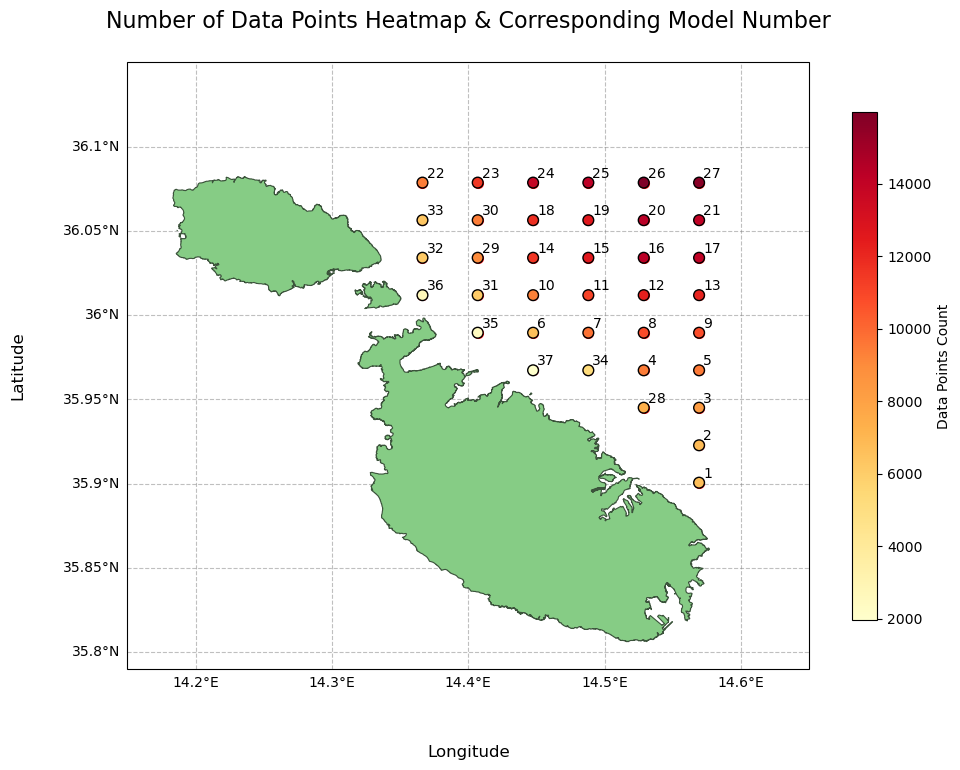

In [49]:
data = {
    'Latitude': latitude,
    'Longitude': longitude,
    'Number': list(range(1, 38))
}

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(11, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent based on your geographic boundaries
ax.set_extent([14.15, 14.65, 35.79, 36.15])

# Plot the coastline
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Load the counts and coordinates into a DataFrame
df = pd.DataFrame(data)
df['Count'] = [
    6694, 6804, 8293, 9458, 9507, 6729, 9718, 10792, 10783,
    9350, 11153, 12368, 12187, 11500, 12616, 14282, 14072,
    11792, 12634, 14282, 14120, 9464, 11484, 13834, 14137,
    15989, 15703, 7301, 8998, 9364, 6111, 6154, 6324, 5224,
    2489, 2683, 1964
]

# Plot the points and annotate them with their corresponding number, slightly offset
for lat, lon, number in zip(data['Latitude'], data['Longitude'], data['Number']):
    ax.plot(lon, lat, marker='o', color='red', markersize=7, transform=ccrs.Geodetic())
    offset_lat = 0.003
    offset_lon = 0.003
    ax.text(lon + offset_lon, lat + offset_lat, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

# Create the heatmap using a scatter plot, using the actual count values for the color
scatter = ax.scatter(
    df['Longitude'], df['Latitude'],
    s=60,  
    c=df['Count'],  
    cmap='YlOrRd',  
    edgecolor='k',  
    transform=ccrs.Geodetic(),
    zorder=3  
)

# Add colorbar to the right of the plot, using the actual count values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Data Points Count')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Number of Data Points Heatmap & Corresponding Model Number", pad=25, fontsize=16)
ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

# Show the plot
plt.show()

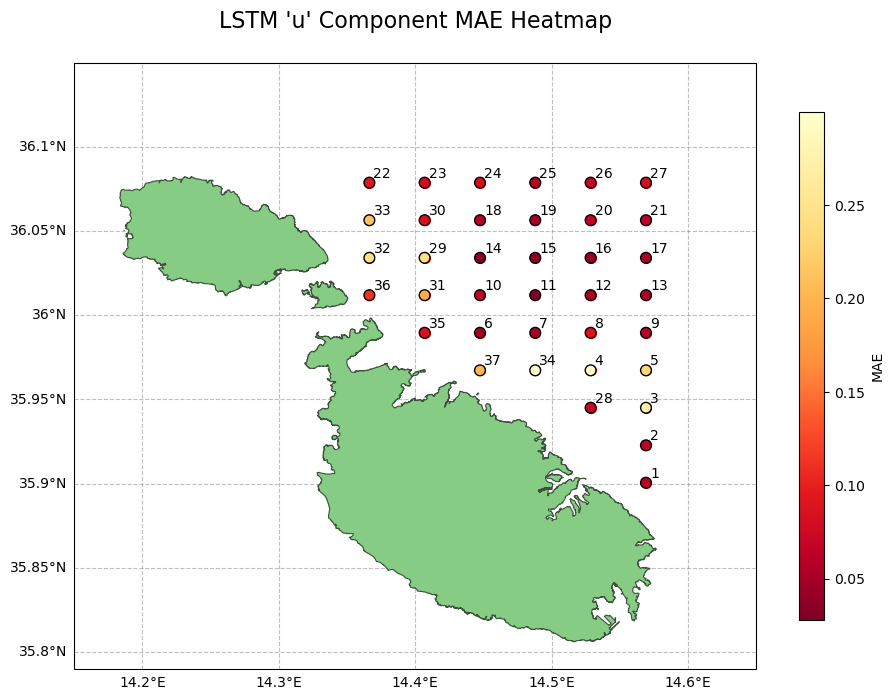

In [48]:
import numpy as np

mae_values = [
    0.06108554717145389, 0.06540178835727949, 0.27017779957200155, 0.4191201531496805, 0.23282335884857464,
    0.05013517712894045, 0.050484753608618094, 0.08900179101651136, 0.05872434321910889, 0.06931665547807252,
    0.027900122749753394, 0.053315444730983354, 0.05379749083481605, 0.0349735396140012, 0.03716759524977071,
    0.04047005151885849, 0.0543720211459473, 0.05937918207302967, 0.05090706371383844, 0.06556309103622539,
    0.064213053962765, 0.091944696288818, 0.07947235137120495, 0.08146665037097364, 0.05787147793813754,
    0.07023683902356578, 0.08203857247434233, 0.07313875131890932, 0.2435463228052995, 0.08622150060341523, 
    0.19159777811756087, 0.24320531926974734, 0.21360758601351373, 1.402222516584806, 0.08609451169372799,
    0.1126734686630478, 0.20293174525285765
] 

data = {
    'Latitude': latitude,
    'Longitude': longitude,
    'MAE': mae_values,
    'Number': list(range(1, 38))
}

df = pd.DataFrame(data)

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(11, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent based on your geographic boundaries
ax.set_extent([14.15, 14.65, 35.79, 36.15])

# Plot the coastline
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Set a threshold value to clip the MAE values
threshold = np.percentile(df['MAE'], 95)  

# Clip the MAE values at the threshold
df['Clipped_MAE'] = np.clip(df['MAE'], None, threshold)

# Now plot using the clipped MAE values
scatter = ax.scatter(df['Longitude'], df['Latitude'],
                     s=60,  
                     c=df['Clipped_MAE'], 
                     cmap='YlOrRd_r',  
                     edgecolor='k',  
                     transform=ccrs.Geodetic(),
                     zorder=3)  

# Add colorbar to the right of the plot using actual MAE values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('MAE')

# Plot the points and annotate them with their corresponding number, slightly offset
for lat, lon, number in zip(data['Latitude'], data['Longitude'], data['Number']):
    ax.plot(lon, lat, marker='o', color='red', markersize=7, transform=ccrs.Geodetic())
    offset_lat = 0.003
    offset_lon = 0.003
    ax.text(lon + offset_lon, lat + offset_lat, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("LSTM 'u' Component MAE Heatmap", pad=25, fontsize=16)

# Show the plot
plt.show()

In [43]:
mae_values = [
    0.06108554717145389, 0.06540178835727949, 0.27017779957200155, 0.4191201531496805, 0.23282335884857464,
    0.05013517712894045, 0.050484753608618094, 0.08900179101651136, 0.05872434321910889, 0.06931665547807252,
    0.027900122749753394, 0.053315444730983354, 0.05379749083481605, 0.0349735396140012, 0.03716759524977071,
    0.04047005151885849, 0.0543720211459473, 0.05937918207302967, 0.05090706371383844, 0.06556309103622539,
    0.064213053962765, 0.091944696288818, 0.07947235137120495, 0.08146665037097364, 0.05787147793813754,
    0.07023683902356578, 0.08203857247434233, 0.07313875131890932, 0.2435463228052995, 0.08622150060341523, 
    0.19159777811756087, 0.24320531926974734, 0.21360758601351373, 1.402222516584806, 0.08609451169372799,
    0.1126734686630478, 0.20293174525285765
]

# Find the highest value excluding the outlier 1.402222516584806
sorted_values = sorted([val for val in mae_values if val != max(mae_values)])
highest_after_outlier = sorted_values[-1]

highest_after_outlier

0.4191201531496805